In [1]:
!pip install --upgrade scikit-learn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 22.3 MB 37 kB/s  eta 0:00:01    |███▊                            | 2.6 MB 932 kB/s eta 0:00:22


In [2]:
!pip install seaborn -U

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.0 MB/s eta 0:00:01


<font color='maroon'>Project Goal</font>\
Preparing a prototype of a machine learning model for Zyfra. This company develops efficiency solutions for heavy industry. The interested model should predict the amount of gold recovered from gold ore.

## Prepare the data

### Open the files and look into the data.

In [1]:
#Importing libraries and loading datasets.
import scipy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.pipeline import Pipeline
from sklearn.dummy import DummyRegressor


gold_train = pd.read_csv('/datasets/gold_recovery_train.csv')
gold_test = pd.read_csv('/datasets/gold_recovery_test.csv')
gold_full = pd.read_csv('/datasets/gold_recovery_full.csv')

In [2]:
display(gold_train)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16855,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
16856,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
16857,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
16858,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [3]:
display(gold_test)

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5851,2017-12-31 19:59:59,173.957757,15.963399,8.070000,0.896701,1401.930554,-499.728848,1401.441445,-499.193423,1399.810313,...,13.995957,-500.157454,12.069155,-499.673279,7.977259,-499.516126,5.933319,-499.965973,8.987171,-499.755909
5852,2017-12-31 20:59:59,172.910270,16.002605,8.070000,0.896519,1447.075722,-494.716823,1448.851892,-465.963026,1443.890424,...,16.749781,-496.031539,13.365371,-499.122723,9.288553,-496.892967,7.372897,-499.942956,8.986832,-499.903761
5853,2017-12-31 21:59:59,171.135718,15.993669,8.070000,1.165996,1498.836182,-501.770403,1499.572353,-495.516347,1502.749213,...,19.994130,-499.791312,15.101425,-499.936252,10.989181,-498.347898,9.020944,-500.040448,8.982038,-497.789882
5854,2017-12-31 22:59:59,179.697158,15.438979,8.070000,1.501068,1498.466243,-500.483984,1497.986986,-519.200340,1496.569047,...,19.958760,-499.958750,15.026853,-499.723143,11.011607,-499.985046,9.009783,-499.937902,9.012660,-500.154284


In [4]:
display(gold_full)

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22711,2018-08-18 06:59:59,3.224920,11.356233,6.803482,46.713954,73.755150,8.769645,3.141541,10.403181,1.529220,...,23.031497,-501.167942,20.007571,-499.740028,18.006038,-499.834374,13.001114,-500.155694,20.007840,-501.296428
22712,2018-08-18 07:59:59,3.195978,11.349355,6.862249,46.866780,69.049291,8.897321,3.130493,10.549470,1.612542,...,22.960095,-501.612783,20.035660,-500.251357,17.998535,-500.395178,12.954048,-499.895163,19.968498,-501.041608
22713,2018-08-18 08:59:59,3.109998,11.434366,6.886013,46.795691,67.002189,8.529606,2.911418,11.115147,1.596616,...,23.015718,-501.711599,19.951231,-499.857027,18.019543,-500.451156,13.023431,-499.914391,19.990885,-501.518452
22714,2018-08-18 09:59:59,3.367241,11.625587,6.799433,46.408188,65.523246,8.777171,2.819214,10.463847,1.602879,...,23.024963,-501.153409,20.054122,-500.314711,17.979515,-499.272871,12.992404,-499.976268,20.013986,-500.625471


In [5]:
gold_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16860 entries, 0 to 16859
Data columns (total 87 columns):
date                                                  16860 non-null object
final.output.concentrate_ag                           16788 non-null float64
final.output.concentrate_pb                           16788 non-null float64
final.output.concentrate_sol                          16490 non-null float64
final.output.concentrate_au                           16789 non-null float64
final.output.recovery                                 15339 non-null float64
final.output.tail_ag                                  16794 non-null float64
final.output.tail_pb                                  16677 non-null float64
final.output.tail_sol                                 16715 non-null float64
final.output.tail_au                                  16794 non-null float64
primary_cleaner.input.sulfate                         15553 non-null float64
primary_cleaner.input.depressant             

In [6]:
gold_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5856 entries, 0 to 5855
Data columns (total 53 columns):
date                                          5856 non-null object
primary_cleaner.input.sulfate                 5554 non-null float64
primary_cleaner.input.depressant              5572 non-null float64
primary_cleaner.input.feed_size               5856 non-null float64
primary_cleaner.input.xanthate                5690 non-null float64
primary_cleaner.state.floatbank8_a_air        5840 non-null float64
primary_cleaner.state.floatbank8_a_level      5840 non-null float64
primary_cleaner.state.floatbank8_b_air        5840 non-null float64
primary_cleaner.state.floatbank8_b_level      5840 non-null float64
primary_cleaner.state.floatbank8_c_air        5840 non-null float64
primary_cleaner.state.floatbank8_c_level      5840 non-null float64
primary_cleaner.state.floatbank8_d_air        5840 non-null float64
primary_cleaner.state.floatbank8_d_level      5840 non-null float64
rougher.in

In [7]:
gold_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22716 entries, 0 to 22715
Data columns (total 87 columns):
date                                                  22716 non-null object
final.output.concentrate_ag                           22627 non-null float64
final.output.concentrate_pb                           22629 non-null float64
final.output.concentrate_sol                          22331 non-null float64
final.output.concentrate_au                           22630 non-null float64
final.output.recovery                                 20753 non-null float64
final.output.tail_ag                                  22633 non-null float64
final.output.tail_pb                                  22516 non-null float64
final.output.tail_sol                                 22445 non-null float64
final.output.tail_au                                  22635 non-null float64
primary_cleaner.input.sulfate                         21107 non-null float64
primary_cleaner.input.depressant             

### Check that recovery is calculated correctly. Using the training set, calculate recovery for the rougher.output.recovery feature. Find the MAE between your calculations and the feature values. Provide findings.

In [8]:
#Understanding if there are NaN values in the target column.
print('Lunghezza della colonna recovery:', len(gold_train['rougher.output.recovery']))
print('NaNs nella colonna recovery:', gold_train['rougher.output.recovery'].isna().sum())

Lunghezza della colonna recovery: 16860
NaNs nella colonna recovery: 2573


In [9]:
#Creating a Dataframe with the interested columns for MAE calculation and dropping the NaN.
data = gold_train['rougher.output.recovery'],gold_train['rougher.output.concentrate_au'], gold_train['rougher.input.feed_au'], gold_train['rougher.output.tail_au']
headers = ['rougher.output.recovery','rougher.output.concentrate_au', 'rougher.input.feed_au', 'rougher.output.tail_au']
df_temporany = pd.concat(data, axis=1, keys=headers)
df_temporany = df_temporany.dropna()
display(df_temporany)

,rougher.output.recovery,rougher.output.concentrate_au,rougher.input.feed_au,rougher.output.tail_au
0,87.107763,19.793808,6.486150,1.170244
1,86.843261,20.050975,6.478583,1.184827
2,86.842308,19.737170,6.362222,1.162562
3,87.226430,19.320810,6.118189,1.079755
4,86.688794,19.216101,5.663707,1.012642
...,...,...,...,...
16855,89.574376,18.603550,5.335862,0.748633
16856,87.724007,18.441436,4.838619,0.771582
16857,88.890579,15.111231,4.525061,0.685059
16858,89.858126,17.834772,4.362781,0.567130


In [10]:
#Defining a function to calculate Recovery after the floatation stage for the training set.
def recovery_funct(C_rougher, F_rougher, T_rougher):
    recovery = (C_rougher * (F_rougher - T_rougher)) / (F_rougher * (C_rougher - T_rougher)) * 100
    print(recovery)
    print()
    print('The number of NaN values in the recovery calculation:', recovery.isna().sum())   
    print()
    print('The number of non-null values in the recovery after the flotation stage is:', (len(recovery) - (recovery.isna().sum())))
    return(recovery)

In [11]:
#Storing function results in a variable.
recovery = recovery_funct(df_temporany['rougher.output.concentrate_au'],df_temporany['rougher.input.feed_au'],\
                          df_temporany['rougher.output.tail_au'])

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Length: 14287, dtype: float64

The number of NaN values in the recovery calculation: 0

The number of non-null values in the recovery after the flotation stage is: 14287


In [12]:
#Creating a list to save comparing values for MAE calculation from the rougher.output.recovery column. Eliminating NaNs.
features_rougher_mae = gold_train['rougher.output.recovery']
features_rougher_mae = features_rougher_mae.dropna()
display(features_rougher_mae)
print('The number of NaN values in the recovery after the flotation stage is::', features_rougher_mae.isna().sum())   
print()
print('The number of non-null values in the recovery after the flotation stage is:', len(features_rougher_mae))

0        87.107763
1        86.843261
2        86.842308
3        87.226430
4        86.688794
           ...    
16855    89.574376
16856    87.724007
16857    88.890579
16858    89.858126
16859    89.514960
Name: rougher.output.recovery, Length: 14287, dtype: float64

The number of NaN values in the recovery after the flotation stage is:: 0

The number of non-null values in the recovery after the flotation stage is: 14287


In [13]:
print('MAE:', (mean_absolute_error(features_rougher_mae, recovery)))

MAE: 9.444891926100695e-15


### Analyze the features not available in the test set. What are these parameters? What is their type?

In [14]:
# Finding names of different columns.
print(set(gold_train.columns).symmetric_difference(gold_test.columns))

{'final.output.tail_pb', 'primary_cleaner.output.concentrate_au', 'secondary_cleaner.output.tail_au', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_ag', 'final.output.concentrate_ag', 'rougher.output.tail_au', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_pb', 'rougher.output.concentrate_sol', 'final.output.tail_ag', 'final.output.concentrate_pb', 'primary_cleaner.output.tail_ag', 'final.output.tail_sol', 'rougher.output.tail_sol', 'rougher.calculation.sulfate_to_au_concentrate', 'rougher.output.concentrate_pb', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'final.output.concentrate_sol', 'secondary_cleaner.output.tail_ag', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_sol', 'final.output.concentrate_au', 'rougher.output.concentrate_ag', 'primary_cleaner.output.tail_au', 'final.output.recovery', 'rougher.cal

In [15]:
#Creating a df to store those columns to be able to display the data types. Just copy and paste of the list obtained.
differences = gold_train[['rougher.output.tail_au', 'rougher.output.tail_sol', 'final.output.concentrate_au', 'rougher.output.concentrate_au', 'final.output.concentrate_ag', 'secondary_cleaner.output.tail_pb', 'final.output.concentrate_pb', 'primary_cleaner.output.concentrate_au', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.calculation.floatbank11_sulfate_to_au_feed', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'rougher.output.tail_ag', 'rougher.output.tail_pb', 'final.output.tail_pb', 'final.output.tail_au', 'primary_cleaner.output.concentrate_ag', 'rougher.output.concentrate_sol', 'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.tail_sol', 'rougher.output.recovery', 'secondary_cleaner.output.tail_au', 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_ag', 'final.output.tail_sol', 'rougher.output.concentrate_pb', 'final.output.recovery', 'rougher.calculation.au_pb_ratio', 'final.output.tail_ag', 'final.output.concentrate_sol', 'rougher.calculation.sulfate_to_au_concentrate']]

In [16]:
# Displaying columns names and relative data types.
print(differences.dtypes)

rougher.output.tail_au                                float64
rougher.output.tail_sol                               float64
final.output.concentrate_au                           float64
rougher.output.concentrate_au                         float64
final.output.concentrate_ag                           float64
secondary_cleaner.output.tail_pb                      float64
final.output.concentrate_pb                           float64
primary_cleaner.output.concentrate_au                 float64
rougher.calculation.floatbank10_sulfate_to_au_feed    float64
rougher.calculation.floatbank11_sulfate_to_au_feed    float64
secondary_cleaner.output.tail_ag                      float64
primary_cleaner.output.concentrate_pb                 float64
rougher.output.tail_ag                                float64
rougher.output.tail_pb                                float64
final.output.tail_pb                                  float64
final.output.tail_au                                  float64
primary_

### Perform data preprocessing.

In [17]:
#Eliminating all NaNs from the datasets.
gold_train = gold_train.dropna(how='any')
gold_test = gold_test.dropna(how='any')

In [18]:
#Printing out the sum of NaNs remained.
print('NaNs in gold_train:', gold_train.isna().sum().sum())
print('NaNs in gold_test:', gold_test.isna().sum().sum())

NaNs in gold_train: 0
NaNs in gold_test: 0


In [19]:
print('Training data shape:', gold_train.shape)
print('Testing data shape:', gold_test.shape)

Training data shape: (11017, 87)
Testing data shape: (5383, 53)


# Brief summarize - Point 1 

1.1\
We have three datasets, a full datasets, a training and a test dataset. Those are already splitted from the full. 

- The full dataset is composed by 22715 rows and 87 columns.
- The training dataset instead by 16860 rows and 87 columns.
- The test dataset is composed by  5856 rows and 53 columns.

Merging the training and test dataset we obtain the full one. \
From the TEST dataset are missing output and calculation columns (34 missing columns).

1.2\
We need to understand if the recovery provided by the features values in our possess is calculated correctly or not. \
In doing so we first need to get rid off the NaNs values present in recovery column (our current target).\
After the elimination process we can define the function to calculate recovery this way:

![Recovery formula](https://pictures.s3.yandex.net/resources/Recovery_1576238822_1589899219.jpg)
\
Saved in an array the results from recovery function and compared to the ['rougher.output.recovery'] column.\
The result of the comparation did with the help of mean absolute error function is MAE: 9.444891926100695e-15
\
This clearly indicates that the values in the two array (my calculations and the column) are almost identical. 

1.3\
The different number of rows in the two dataset derives from the fact, that the full dataset was splitted.\
For this reason the most important difference among the two dataset is about the columns number.\
From the testing dataset are missing 34 columns: we want to identify them and understand their type.\
The list of the missing columns can be obtained with the following code:
```python 
set(gold_train.columns).symmetric_difference(gold_test.columns)```
Checking their type we understand that they are all floating points and as already said, they represent mostly output and calculation values.

1.4\
In the step related to datapreprocess decided to drop any NaNs values from the dataset obtaining 
- Training data shape: (11017, 87)
- Testing data shape: (5383, 53)

## Analyze the data

### Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.

In [20]:
#Calculating mean for every interested column.
print('MEANS')
print()
print('Concentration of substances as flotation stage input:')
print('The mean of concentrate AU before floatation stage is:', gold_train['rougher.input.feed_au'].mean())
print('The mean of concentrate AG before floatation stage is:', gold_train['rougher.input.feed_ag'].mean())
print('The mean of concentrate PB before floatation stage is:', gold_train['rougher.input.feed_pb'].mean())
print()
print('Concentration after floatation stage:')
print('The mean of concentrate AU after floatation stage is:', gold_train['rougher.output.concentrate_au'].mean())
print('The mean of concentrate AG after floatation stage is:', gold_train['rougher.output.concentrate_ag'].mean())
print('The mean of concentrate PB after floatation stage is:', gold_train['rougher.output.concentrate_pb'].mean())
print()
print('Concentration after primary cleaner stage:')
print('The mean of concentrate AU after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_au'].mean())
print('The mean of concentrate AG after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_ag'].mean())
print('The mean of concentrate PB after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_pb'].mean())

MEANS

Concentration of substances as flotation stage input:
The mean of concentrate AU before floatation stage is: 8.107739070690842
The mean of concentrate AG before floatation stage is: 8.773064688275284
The mean of concentrate PB before floatation stage is: 3.5547770221834445

Concentration after floatation stage:
The mean of concentrate AU after floatation stage is: 19.77678757319102
The mean of concentrate AG after floatation stage is: 11.841981713010684
The mean of concentrate PB after floatation stage is: 7.612322661398414

Concentration after primary cleaner stage:
The mean of concentrate AU after primary purification stage is: 32.38098577165496
The mean of concentrate AG after primary purification stage is: 8.437250750365493
The mean of concentrate PB after primary purification stage is: 9.574923645477947


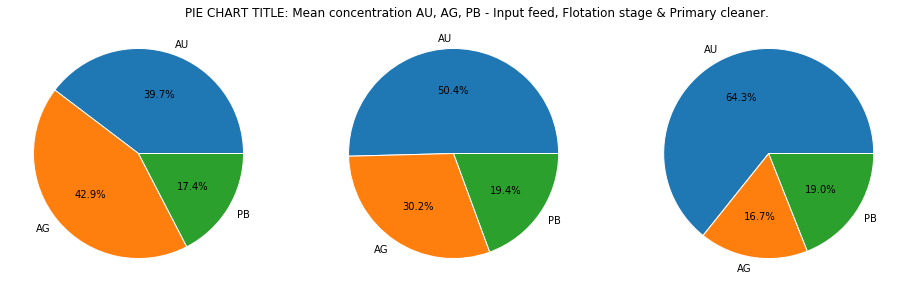

In [21]:
#Building a pie chart to understand percentages of concentration for the intested substances.
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8)) #ax1,ax2 refer to your two pies
slices = [gold_train['rougher.input.feed_au'].mean(), gold_train['rougher.input.feed_ag'].mean(), gold_train['rougher.input.feed_pb'].mean()]
labels = ['AU','AG', 'PB']
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
slices = [gold_train['rougher.output.concentrate_au'].mean(), gold_train['rougher.output.concentrate_ag'].mean(), gold_train['rougher.output.concentrate_pb'].mean()]
labels = ['AU','AG', 'PB']
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.title("PIE CHART TITLE: Mean concentration AU, AG, PB - Input feed, Flotation stage & Primary cleaner.", fontdict={'horizontalalignment': 'right'})
slices = [gold_train['primary_cleaner.output.concentrate_au'].mean(), gold_train['primary_cleaner.output.concentrate_ag'].mean(), gold_train['primary_cleaner.output.concentrate_pb'].mean()]
labels = ['AU','AG', 'PB']
ax3.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.show()

In [22]:
#Calculating median for every interested column.
print('MEDIANS')
print()
print('Concentration of substances as flotation stage input:')
print('The mean of concentrate AU before floatation stage is:', gold_train['rougher.input.feed_au'].median())
print('The mean of concentrate AG before floatation stage is:', gold_train['rougher.input.feed_ag'].median())
print('The mean of concentrate PB before floatation stage is:', gold_train['rougher.input.feed_pb'].median())
print()
print('Concentration after floatation stage:')
print('The median of concentrate AU after floatation stage is:', gold_train['rougher.output.concentrate_au'].median())
print('The median of concentrate AG after floatation stage is:', gold_train['rougher.output.concentrate_ag'].median())
print('The median of concentrate PB after floatation stage is:', gold_train['rougher.output.concentrate_pb'].median())
print()
print('Concentration after primary cleaner stage:')
print('The median of concentrate AU after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_au'].median())
print('The median of concentrate AG after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_ag'].median())
print('The median of concentrate PB after primary purification stage is:', gold_train['primary_cleaner.output.concentrate_pb'].median())

MEDIANS

Concentration of substances as flotation stage input:
The mean of concentrate AU before floatation stage is: 7.865763364331222
The mean of concentrate AG before floatation stage is: 8.366434185592068
The mean of concentrate PB before floatation stage is: 3.444286957581838

Concentration after floatation stage:
The median of concentrate AU after floatation stage is: 20.262236852091192
The median of concentrate AG after floatation stage is: 11.797794105273088
The median of concentrate PB after floatation stage is: 7.7086928677558895

Concentration after primary cleaner stage:
The median of concentrate AU after primary purification stage is: 33.01723200164281
The median of concentrate AG after primary purification stage is: 8.436412262281637
The median of concentrate PB after primary purification stage is: 9.919856388833788


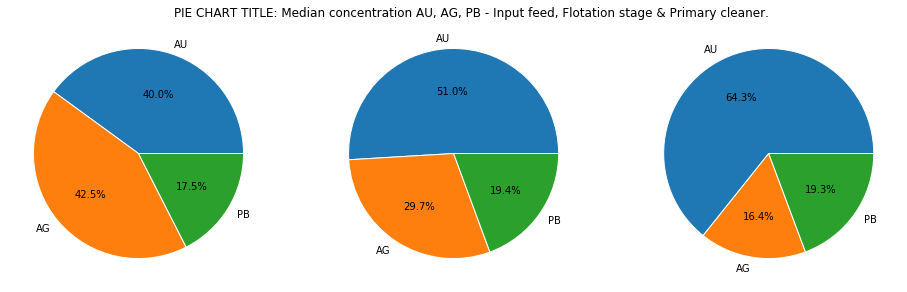

In [23]:
#Building a pie chart to understand percentages of concentration for the intested substances.
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,8)) #ax1,ax2 refer to your two pies
slices = [gold_train['rougher.input.feed_au'].median(), gold_train['rougher.input.feed_ag'].median(), gold_train['rougher.input.feed_pb'].median()]
labels = ['AU','AG', 'PB']
ax1.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
slices = [gold_train['rougher.output.concentrate_au'].median(), gold_train['rougher.output.concentrate_ag'].median(), gold_train['rougher.output.concentrate_pb'].median()]
labels = ['AU','AG', 'PB']
ax2.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.title("PIE CHART TITLE: Median concentration AU, AG, PB - Input feed, Flotation stage & Primary cleaner.", fontdict={'horizontalalignment': 'right'})
slices = [gold_train['primary_cleaner.output.concentrate_au'].median(), gold_train['primary_cleaner.output.concentrate_ag'].median(), gold_train['primary_cleaner.output.concentrate_pb'].median()]
labels = ['AU','AG', 'PB']
ax3.pie(slices, labels=labels, wedgeprops = {'edgecolor': 'white'}, autopct='%1.1f%%')
plt.show()

In [24]:
#Creating a distplots of different stages of the same metal.
def metal_distplot(feed, flotation, primary):
    f, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True)
    sns.despine(left=True)
    sns.histplot(feed, kde=True, color="green", ax = axes[0], common_norm = True)
    axes[0].set_xlabel('Feed flotation stage.') 
    sns.histplot(flotation, kde=True, color="yellow", ax = axes [1], common_norm = True)
    axes[1].set_xlabel('Feed primary cleaner')
    sns.histplot(primary, kde=True, color="red", ax = axes [2], common_norm = True)
    axes[2].set_xlabel('Feed secondary cleaner')
    plt.show()

Concentration variation in AU.


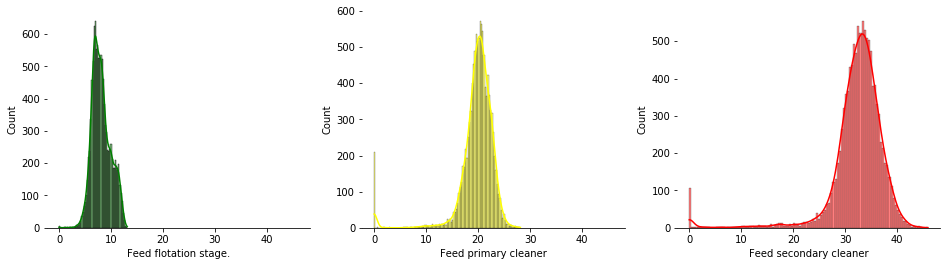

In [25]:
#Building AU Concentration for each stages distplot.
print('Concentration variation in AU.')
metal_distplot(gold_train['rougher.input.feed_au'], gold_train['rougher.output.concentrate_au'], gold_train['primary_cleaner.output.concentrate_au'])

Concentration variation in AG.


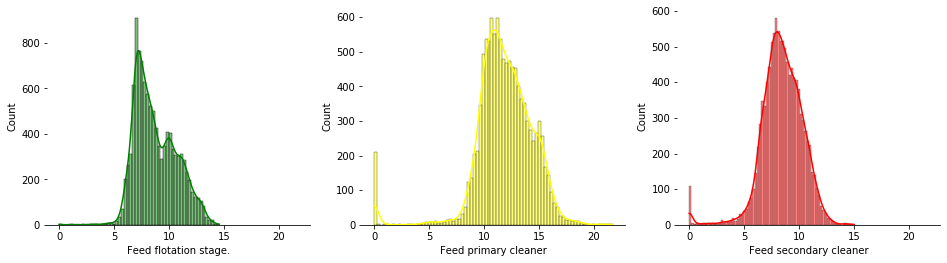

In [26]:
#Building AU Concentration for each stages distplot.
print('Concentration variation in AG.')
metal_distplot(gold_train['rougher.input.feed_ag'], gold_train['rougher.output.concentrate_ag'], gold_train['primary_cleaner.output.concentrate_ag'])

Concentration variation in PB.


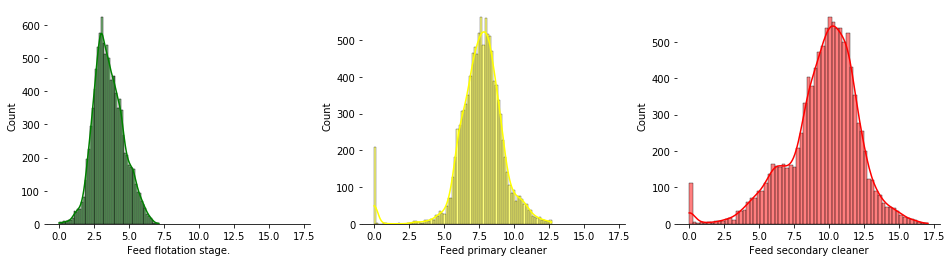

In [27]:
#Building AU Concentration for each stages distplot.
print('Concentration variation in PB.')
metal_distplot(gold_train['rougher.input.feed_pb'], gold_train['rougher.output.concentrate_pb'], gold_train['primary_cleaner.output.concentrate_pb'])

In [28]:
#Measuring the variation among the interest columns.
au_variation = gold_train['primary_cleaner.output.concentrate_au'] - gold_train['rougher.input.feed_au']
ag_variation = gold_train['primary_cleaner.output.concentrate_ag'] - gold_train['rougher.input.feed_ag']
pb_variation = gold_train['primary_cleaner.output.concentrate_pb'] - gold_train['rougher.input.feed_pb']

#Calculating mean of concetration variation.
print('VARIATION OF MEANS')
print()
print('The concentration of AU has changed in mean', au_variation.mean())
print('The concentration of AG has changed in mean', ag_variation.mean())
print('The concentration of PB has changed in mean', pb_variation.mean())
print()

VARIATION OF MEANS

The concentration of AU has changed in mean 24.273246700964116
The concentration of AG has changed in mean -0.3358139379097911
The concentration of PB has changed in mean 6.020146623294502



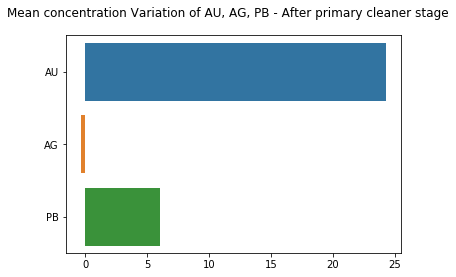

In [29]:
slices = [au_variation.mean(), ag_variation.mean(), pb_variation.mean()]
labels = ['AU','AG', 'PB']
sns.barplot(x = slices, y= labels)
plt.suptitle("Mean concentration Variation of AU, AG, PB - After primary cleaner stage")
plt.show()

In [30]:
#Calculating median of concetration variation. 
print('VARIATION OF MEDIANS')
print()
print('The concentration of AU has changed in median', au_variation.median())
print('The concentration of AG has changed in median', ag_variation.median())
print('The concentration of PB has changed in median', pb_variation.median())

VARIATION OF MEDIANS

The concentration of AU has changed in median 24.947908733722443
The concentration of AG has changed in median -0.20375636421343302
The concentration of PB has changed in median 6.324499586290784


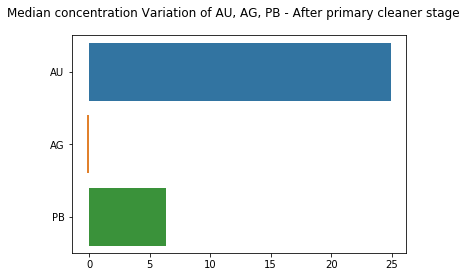

In [31]:
slices = [au_variation.median(), ag_variation.median(), pb_variation.median()]
labels = ['AU','AG', 'PB']
sns.barplot(x = slices, y= labels)
plt.suptitle("Median concentration Variation of AU, AG, PB - After primary cleaner stage")
plt.show()

### Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

In [32]:
sns.set_style('darkgrid')

In [33]:
# Defining histograms subplot function.
def feed_size_histograms(feed_train, feed_test):
    plt.figure(figsize=(16, 8))
    sns.despine(left=True)
    sns.histplot(feed_train, kde=True, color="blue", common_norm = True)
    sns.histplot(feed_test, kde=True, color="m", common_norm = True)
    plt.show()

Feed size particles in training set and test set. - Before flotation stage


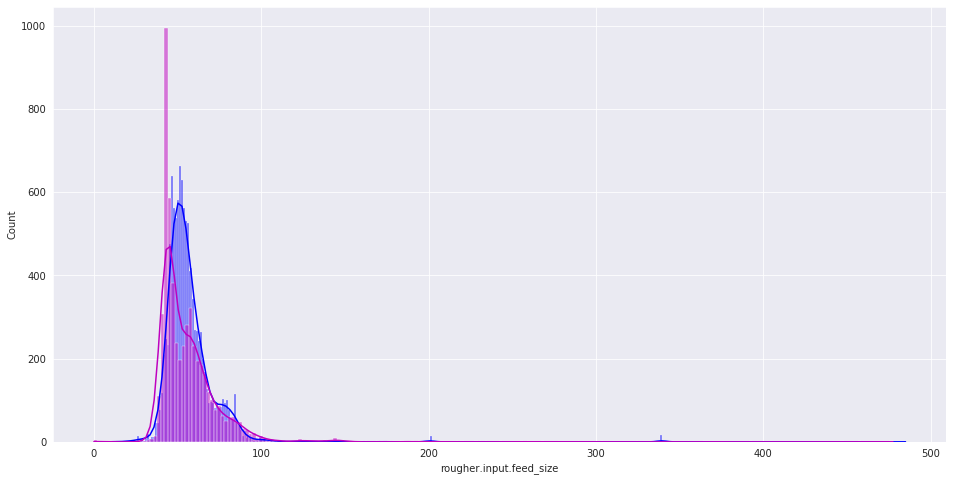

In [34]:
print('Feed size particles in training set and test set. - Before flotation stage')
feed_size_histograms(gold_train['rougher.input.feed_size'], gold_test['rougher.input.feed_size'])

In [35]:
#Eliminating anomalies from training set.
gold_train = gold_train.loc[gold_train['rougher.input.feed_size']  > 40]
gold_train = gold_train.loc[gold_train['rougher.input.feed_size']  < 100] 
gold_test = gold_test.loc[gold_test['rougher.input.feed_size']  > 40] 
gold_test = gold_test.loc[gold_test['rougher.input.feed_size']  < 100] 

Feed size particles in training set and test set without anomalies. - Before flotation stage


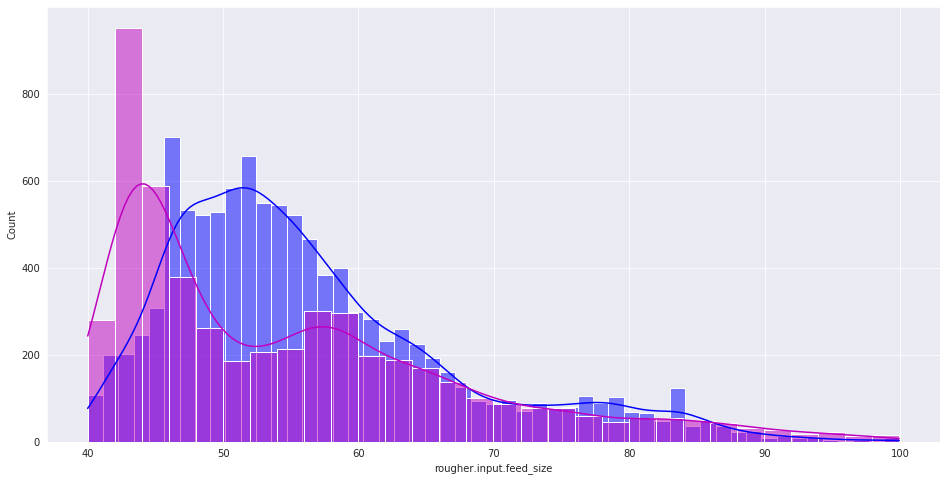

In [36]:
#Comparing feed particle size after flotation stage.
print('Feed size particles in training set and test set without anomalies. - Before flotation stage')
feed_size_histograms(gold_train['rougher.input.feed_size'], gold_test['rougher.input.feed_size'])

Feed size particles in training set and test set without anomalies. - Before flotation stage - DENSITY


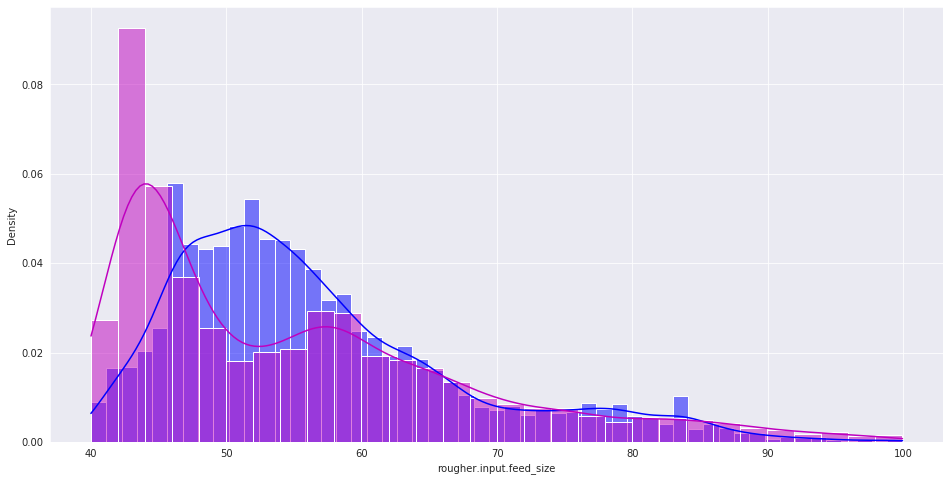

In [37]:
#TRAINING SET
#Density histograms without outliers.
print('Feed size particles in training set and test set without anomalies. - Before flotation stage - DENSITY')
plt.figure(figsize=(16, 8))
sns.despine(left=True)
sns.histplot(gold_train['rougher.input.feed_size'], kde=True, color="blue", common_norm = True, stat='density')
sns.histplot(gold_test['rougher.input.feed_size'], kde=True, color="m", common_norm = True, stat= 'density')
plt.show()

Feed size particles in training set and test set. - Before primary cleaner stage


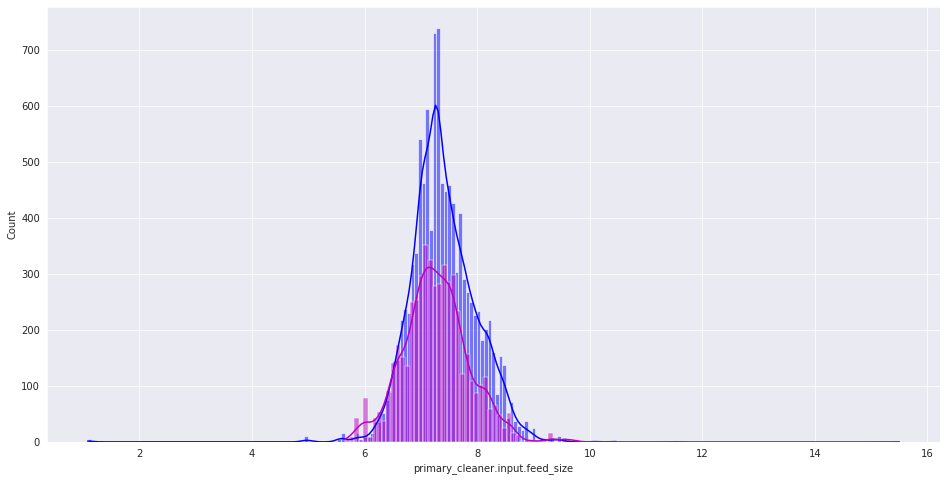

In [38]:
#Comparing feed particle size after the primary cleaner stage.
print('Feed size particles in training set and test set. - Before primary cleaner stage')
feed_size_histograms(gold_train['primary_cleaner.input.feed_size'], gold_test['primary_cleaner.input.feed_size'])

In [39]:
gold_train = gold_train.loc[gold_train['primary_cleaner.input.feed_size']  > 5]
gold_train = gold_train.loc[gold_train['primary_cleaner.input.feed_size']   < 9]
gold_test = gold_test.loc[gold_test['primary_cleaner.input.feed_size']   > 5]
gold_test = gold_test.loc[gold_test['primary_cleaner.input.feed_size']   < 9]

Feed size particles in training set and test set without anomalies. - Before primary cleaner stage


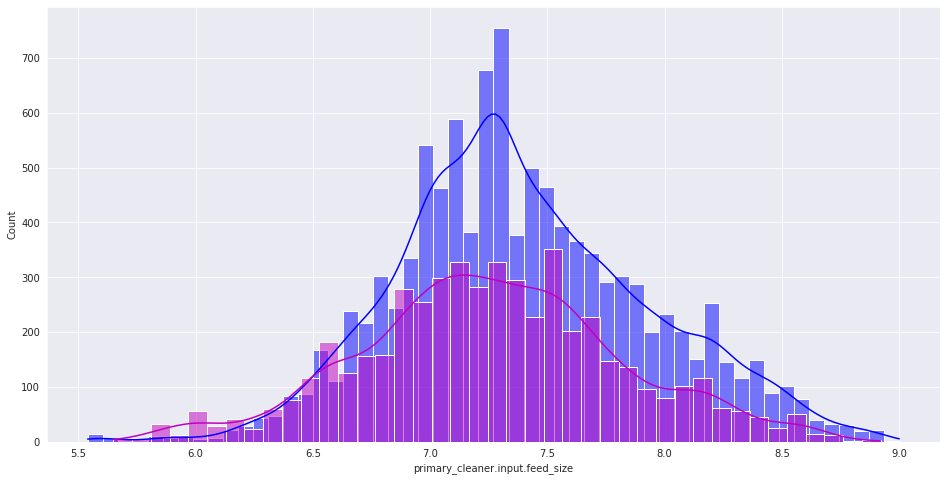

In [40]:
#Comparing feed particle size after the primary cleaner stage.
print('Feed size particles in training set and test set without anomalies. - Before primary cleaner stage')
feed_size_histograms(gold_train['primary_cleaner.input.feed_size'], gold_test['primary_cleaner.input.feed_size'])

Feed size particles in training set and test set without anomalies. - Before primary cleaner stage - DENSITY


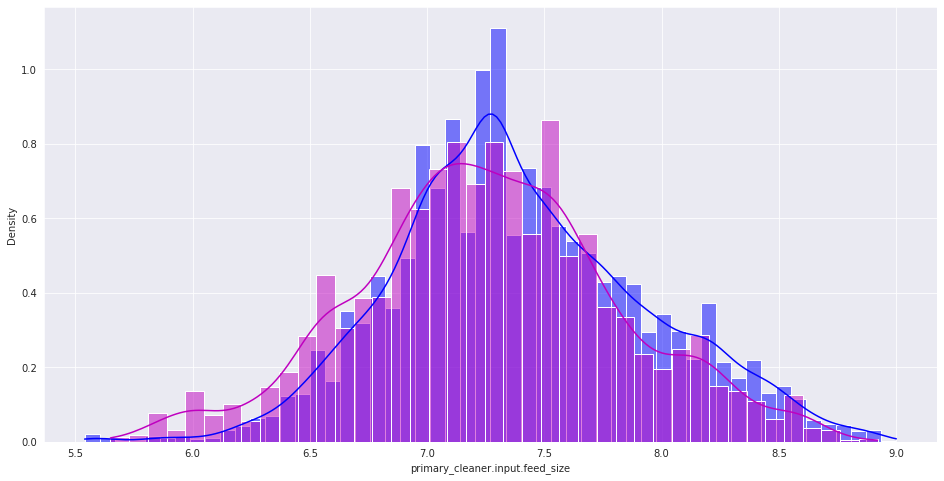

In [41]:
#TESTING SET
#Density histograms without outliers.
print('Feed size particles in training set and test set without anomalies. - Before primary cleaner stage - DENSITY')
plt.figure(figsize=(16, 8))
sns.despine(left=True)
sns.histplot(gold_train['primary_cleaner.input.feed_size'], kde=True, color="blue", common_norm = True, stat='density')
sns.histplot(gold_test['primary_cleaner.input.feed_size'], kde=True, color="m", common_norm = True, stat= 'density')
plt.show()

### Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

In [42]:
gold_train['rougher.input.feed_total'] = gold_train['rougher.input.feed_au'] + gold_train['rougher.input.feed_ag'] + gold_train['rougher.input.feed_pb'] + gold_train['rougher.input.feed_sol']
gold_train['rougher.output.feed_total'] = gold_train['rougher.output.concentrate_au'] + gold_train['rougher.output.concentrate_ag'] + gold_train['rougher.output.concentrate_pb'] + gold_train['rougher.output.concentrate_sol']
gold_train['primary_cleaner.output.feed_total'] = gold_train['primary_cleaner.output.concentrate_au'] + gold_train['primary_cleaner.output.concentrate_ag'] + gold_train['primary_cleaner.output.concentrate_pb'] + gold_train['primary_cleaner.output.concentrate_sol']
gold_train['final.output.feed_total'] = gold_train['final.output.concentrate_au'] + gold_train['final.output.concentrate_ag'] + gold_train['final.output.concentrate_pb'] + gold_train['final.output.concentrate_sol']

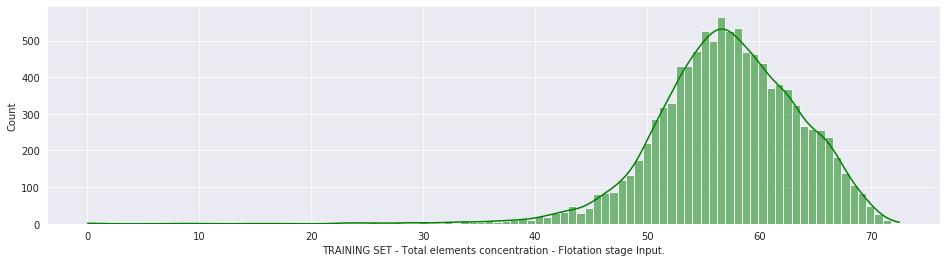

In [43]:
#TRAINING SET.
#Plotting the total concentration on flotation stage input stage.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('TRAINING SET - Total elements concentration - Flotation stage Input.')
plt.show()

In [44]:
#Eliminating anomalies before flotation in test dataset.
gold_train = gold_train.loc[gold_train['rougher.input.feed_total'] > 35]

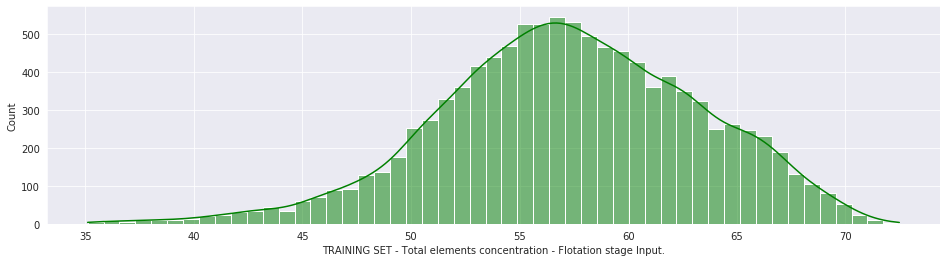

In [45]:
#Same figure without outliers.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('TRAINING SET - Total elements concentration - Flotation stage Input.')
plt.show()

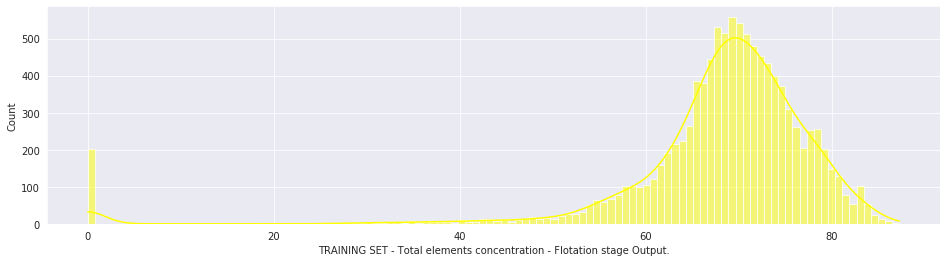

In [46]:
#TRAINING SET.
#Plotting the total concentration on floatation stage output stage.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['rougher.output.feed_total'], kde=True, color='yellow')
plt.xlabel('TRAINING SET - Total elements concentration - Flotation stage Output.')
plt.show()

In [47]:
#Eliminating anomalies after flotation stage.
gold_train = gold_train.loc[gold_train['rougher.output.feed_total'] > 40]

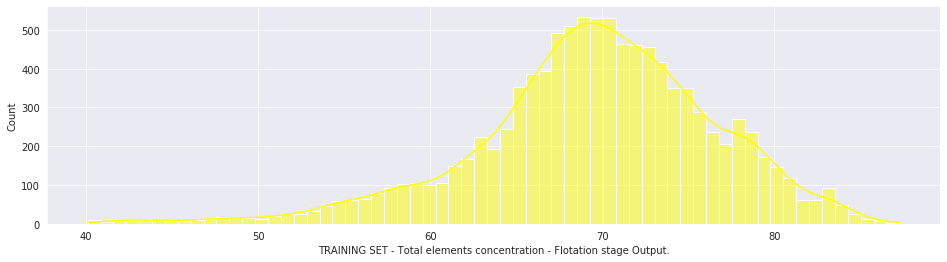

In [48]:
#Same figure without outliers.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['rougher.output.feed_total'], kde=True, color='yellow')
plt.xlabel('TRAINING SET - Total elements concentration - Flotation stage Output.')
plt.show()

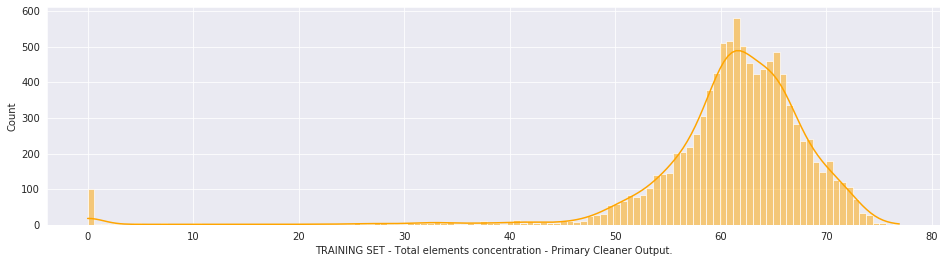

In [49]:
#TRAINING SET.
#Plotting the total concentration on primary cleaner stage.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['primary_cleaner.output.feed_total'], kde=True, color='orange')
plt.xlabel('TRAINING SET - Total elements concentration - Primary Cleaner Output.')
plt.show()

In [50]:
#Eliminating anomalies after primary cleaner stage.
gold_train = gold_train.loc[gold_train['primary_cleaner.output.feed_total']  > 40]

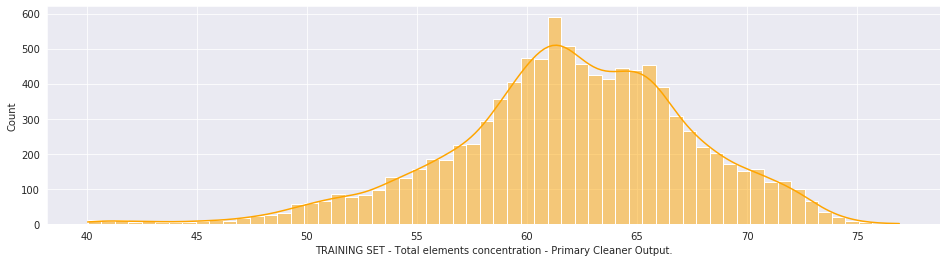

In [51]:
#Same figure without outliers.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['primary_cleaner.output.feed_total'], kde=True, color='orange')
plt.xlabel('TRAINING SET - Total elements concentration - Primary Cleaner Output.')
plt.show()

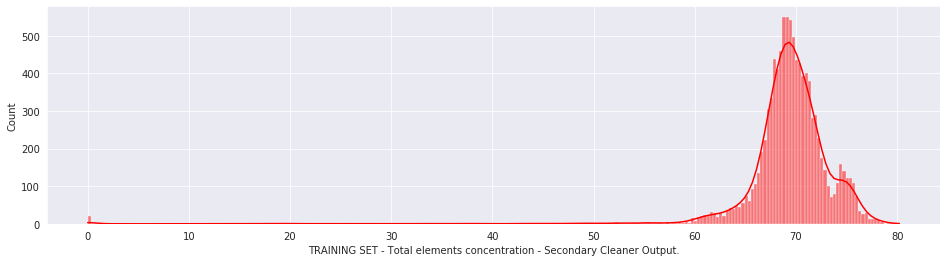

In [52]:
#TRAINING SET.
#Plotting the total concentration on primary cleaner stage.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['final.output.feed_total'], kde=True, color='red')
plt.xlabel('TRAINING SET - Total elements concentration - Secondary Cleaner Output.')
plt.show()

In [53]:
#Eliminating anomalies after secondary cleaner stage.
gold_train =gold_train.loc[gold_train['final.output.feed_total']  > 58]

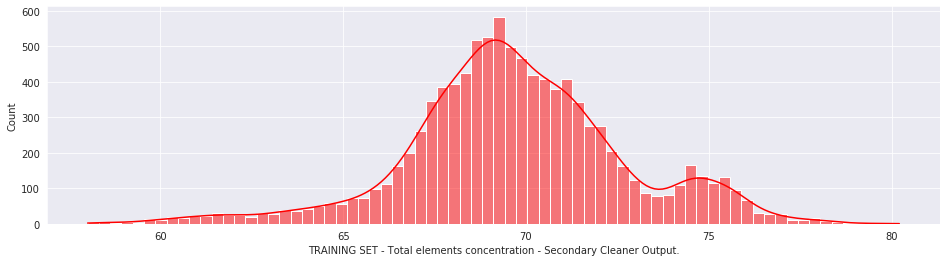

In [54]:
#Same figure without outliers.
plt.figure(figsize=(16,4))
sns.histplot(gold_train['final.output.feed_total'], kde=True, color='red')
plt.xlabel('TRAINING SET - Total elements concentration - Secondary Cleaner Output.')
plt.show()

In [55]:
gold_test['rougher.input.feed_total'] = gold_test['rougher.input.feed_au'] + gold_test['rougher.input.feed_ag'] + gold_test['rougher.input.feed_pb'] + gold_test['rougher.input.feed_sol']

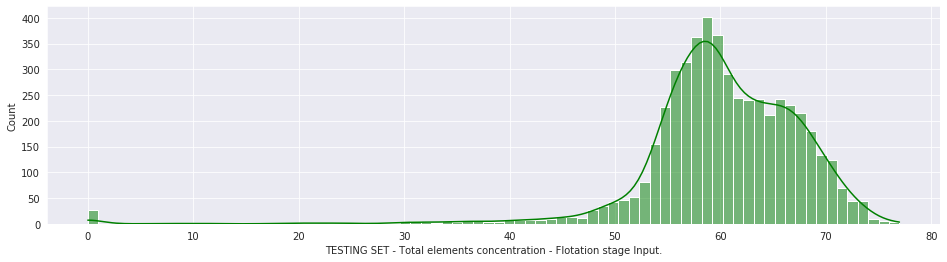

In [56]:
#TESTING SET.
#Plotting the total concentration on flotation stage input stage.
plt.figure(figsize=(16,4))
sns.histplot(gold_test['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('TESTING SET - Total elements concentration - Flotation stage Input.')
plt.show()

In [57]:
#Eliminating anomalies before flotation in test dataset.
gold_test = gold_test.loc[gold_test['rougher.input.feed_total'] > 35]

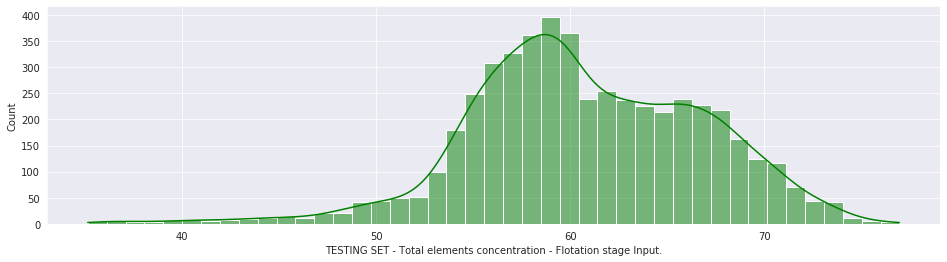

In [58]:
#Same figure without anomalies
plt.figure(figsize=(16,4))
sns.histplot(gold_test['rougher.input.feed_total'], kde=True, color='green')
plt.xlabel('TESTING SET - Total elements concentration - Flotation stage Input.')
plt.show()

In [59]:
print(gold_train.shape)
print(gold_test.shape)

(9877, 91)
(5041, 54)


# Brief summarize - Point 2
# Take note of how the concentrations of metals (Au, Ag, Pb) change depending on the purification stage.
Switching on EDA we want to take note and understand how the concentration of metals change during differents purification stages and take note of the variations of substances.

I wanted to highlight and show the percentage of composition of ore in the two different stages, considering only those three metals. As we can see, the Gold ore mixture has a percentage of: \
MEANS
- AU 39.7%(08.12), AG 42.9%(08.78) and PB 17.4%(3.56) - Before the flotation stage.
- AU 50.4%(19.77), AG 30.2%(11.84) and PB 19.4%(7.61) - After the flotation stage.
- AU 64.3%(32.38), AG 16.7%( 8.43) and PB 19.0%(9.57) - After the primary cleaner.

MEDIANS
- AU 40%(07.85), AG 42.5%(08.34) and PB 17.5%(3.45) - Before the flotation stage.
- AU 51%(20.26), AG 29.7%(11.79) and PB 19.4%(7.70) after the flotation stage.
- AU 64.3%(33.01), AG 16.4%(8.43) and PB 19.3%(9.91) after the primary cleaner.

I proceded plotting the distplot that shown the concentrations of different metals in different stages. \
The stages are identified with colors.
<font color='green'>Green</font> = Feed flotation stage, <font color='yellow'>Yellow</font> = Feed primary cleaner, <font color='red'>Red</font> = Feed secondary cleaner\

- The first displot here is showing AU concentrations at differents stages. During the feeding of the flotation stage AU concentrations vary in a range among 4 and 12. As primary cleaner input instead it has values in range 8 and 26. During secondary cleaner feeding the values are in range 12 and 42.

- The second displot is showing AG concentrations at differents stages. During the feeding of the flotation stage AG concentrations vary in a range among 4 and 15. As primary cleaner input instead it has values in range 4 and 19. During secondary cleaner feeding the values are in range 4 and 15.

- The third displot is showing PB concentrations at differents stages. During the feeding of the flotation stage PB concentrations vary in a range among 0 and 7.5. As primary cleaner input instead has values in range 2.5 and 12.5. During secondary cleaner feeding the values are in range 0 and 17.5.

In this step I wanted also to calculate and visualize total variation of substances starting from the begin of the mixture cycle to the end. We see that:
MEANS 
- The concentration of AU changes in mean 24.273 between the three stages. We have a strong increase of concentration of this element.
- The concentration of AG changes in mean -0.335 between the three stages. We have a slight descrease of concentration of this element.
- The concentration of PB changes in mean  6.020 between the three stages. We have a slight increase of concentration of this element.

MEDIANS 
- The concentration of AU changes in mean 24.947 between the three stages. We have a strong increase of concentration of this element.
- The concentration of AG changes in mean -0.203 between the three stages. We have a slight descrease of concentration of this element.
- The concentration of PB changes in mean  6.324 between the three stages. We have a slight increase of concentration of this element.

We can conclude the section stating that during the different stages, AU increase substantially, PB increase as well while AG remain statical with a really slight decrease of concentration.


# Compare the feed particle size distributions in the training set and in the test set. If the distributions vary significantly, the model evaluation will be incorrect.

- Feed size particles in training set and test dataset. - Before flotation stage
We want to understand if the feed particle size change significantly among the two set, training and test. 
In the first histogram we can see the feed size in the TRAINING SET in <font color='blue'>Blue</font>  and in the TESTING SET in <font color='magenta'>Magenta</font> color.
Here we can notice that the distribution is similar we have a major peak between 40 and 50 units in both samples.
Concerning the first plot we cannot add any further information since outliers distorce the graphic representation of the histograms.\
Eliminating outliers (<40 and >100) for the flotation stage inputs. We obtain a new graph. We see big peaks between 45 and 50 in the training set while the testing set does not present so many values around 50, but the peak on 40 count more values instead.\
Building a density histograms we can confirm everything said before.\
Afterall, we can say that the distribution now looks similar.


- Feed size particles in training set and test set. - Before primary cleaner stage
We have here two histograms and kde figures. The shape is really similar since both histograms count values among 6 and 9, while the height differs, this is normal cause training set count more records. In fact eliminating anomalies with a size inferior to 5 and superior to 9. We can see in the COUNT graph that the shape is similar, looking at the density of the same graphs. We have to equal figures. 

# Consider the total concentrations of all substances at different stages: raw feed, rougher concentrate, and final concentrate. Do you notice any abnormal values in the total distribution? If you do, is it worth removing such values from both samples? Describe the findings and eliminate anomalies.

Developing this point, to answer those questions, I decided to create columns to store the total concentration of substances at different stages. To understand well those graphs is needed to know that: \
<font color='green'>Green</font> represents the flotation stage feed\
<font color='yellow'>Yellow</font> represents the primary cleaner feed\
<font color='orange'>Orange</font> represent the secondary cleaner feed\
<font color='red'>Red</font> represent the secondary cleaner output (To better say our final mixture).

TRAINING SET.
- Concentrations of AU + AG + PB + SOL as flotation stage input.\
The graph is showing that the majority of values are counted among 35 and 70.
For this reason I decided to eliminate every values lower then 36.


- Concentrations of AU + AG + PB + SOL after the flotation stage.\
The graph is showing that the majority of values are counted among 40 and 85.
For this reason I decided to eliminate every values lower then 41. 


- Concentrations of AU + AG + PB + SOL after primary cleaner stage.\
The graph is showing that the majority of values are counted among 40 and 75.
For this reason I decided to eliminate every values lower then 41.


- Concentrations of AU + AG + PB + SOL after secondary cleaner stage. (Final mixture).\
The graph is showing that the majority of values are counted among 60 and 80.
For this reason I decided to eliminate every values lower then 57.

TESTING SET.
- Concentrations of AU + AG + PB + SOL as flotation stage input.\
The graph is showing that the majority of values are counted among 30 and 80.
For this reason I decided to eliminate every values lower then 36.

The resulting datasets after removing anomalies are:
- Training dataset of 9877, 91 shape. (Plus 4 columns from the starting DF)
- Testing dataset of 5041, 54 shape.  (Plus 1 column from the starting DF.)

## Build the model

### Write a function to calculate the final sMAPE value.

In [60]:
#Defining function of Symmetric Mean Absolute Error.
def smape_calculation(target, predictions):
    denominator = (np.abs(target) + np.abs(predictions))
    diff = np.abs(target - predictions) / denominator
    diff[denominator == 0] = 0.0 #avoiding inf values
    return 200 * np.mean(diff)  

In [61]:
#Defining function of Final Symmetric Mean Absolute Error.
def final_smape(smape_1, smape_2):
    f_smape = (smape_1 * 25 / 100) + (smape_2 * 75 / 100)
    f_smape = abs(f_smape)
    print('Final SMAPE score is equal to:', f_smape.round(3), '%')
    return f_smape

### Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

#### Creating and assigning features and target variables for both DataFrames.

In [62]:
#TRAINING DATA
#Removing unecessary columns to build the model for the testing set.
gold_train = gold_train.drop(['primary_cleaner.output.concentrate_sol', 'final.output.tail_pb', 'secondary_cleaner.output.tail_pb',\
                              'primary_cleaner.output.tail_pb', 'final.output.tail_sol', 'final.output.concentrate_sol'],\
                             axis=1)
gold_train = gold_train.drop([ 'secondary_cleaner.output.tail_sol', 'primary_cleaner.output.concentrate_ag', 'rougher.output.tail_pb',\
                              'rougher.output.concentrate_pb', 'final.output.tail_ag', 'primary_cleaner.output.tail_au',\
                              'secondary_cleaner.output.tail_au'], axis=1)
gold_train = gold_train.drop(['rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au',\
                              'rougher.calculation.sulfate_to_au_concentrate', 'secondary_cleaner.output.tail_ag', \
                              'primary_cleaner.output.tail_ag', 'rougher.output.tail_sol'], axis=1)
gold_train = gold_train.drop(['final.output.tail_au', 'rougher.output.concentrate_sol', 'primary_cleaner.output.concentrate_pb',\
                              'primary_cleaner.output.tail_sol', 'final.output.concentrate_ag', 'rougher.output.tail_ag', \
                              'rougher.calculation.floatbank10_sulfate_to_au_feed'], axis=1)
gold_train = gold_train.drop(['final.output.concentrate_au', 'rougher.output.tail_au', \
                              'rougher.output.concentrate_ag', 'final.output.concentrate_pb', 'rougher.calculation.au_pb_ratio', \
                              'rougher.calculation.floatbank11_sulfate_to_au_feed'], axis=1)
gold_train = gold_train.drop(['rougher.output.feed_total', 'primary_cleaner.output.feed_total',\
                              'final.output.feed_total'], axis =1)

In [63]:
#TESTING DATA
#Assigning to temporany DataFrame a target column from gold_full df to merget it with gold_test.
df_target = pd.DataFrame()
df_target['rougher.output.recovery'] = gold_full['rougher.output.recovery']
df_target['date'] = gold_full['date']
df_target['final.output.recovery'] = gold_full['final.output.recovery']
display(df_target)

,rougher.output.recovery,date,final.output.recovery
0,87.107763,2016-01-15 00:00:00,70.541216
1,86.843261,2016-01-15 01:00:00,69.266198
2,86.842308,2016-01-15 02:00:00,68.116445
3,87.226430,2016-01-15 03:00:00,68.347543
4,86.688794,2016-01-15 04:00:00,66.927016
...,...,...,...
22711,89.574376,2018-08-18 06:59:59,73.755150
22712,87.724007,2018-08-18 07:59:59,69.049291
22713,88.890579,2018-08-18 08:59:59,67.002189
22714,89.858126,2018-08-18 09:59:59,65.523246


In [64]:
#TESTING DATA
#Merging gold_test and df_target on date column.
gold_test = gold_test.merge(df_target, on ='date', how='inner')

In [65]:
#TESTING DATA
#Dropping NaN values obtained in the target column.
gold_test = gold_test.dropna()

In [66]:
#Defining features and target for TRAINING DATASET.
train_features = gold_train.drop(['rougher.output.recovery','date', 'final.output.recovery'], axis=1)
train_target_rougher = gold_train['rougher.output.recovery']
train_target_final = gold_train['final.output.recovery']

In [67]:
#Defining features and target for TESTING DATASET.
test_features = gold_test.drop(['rougher.output.recovery','date', 'final.output.recovery'], axis=1)
test_target_rougher = gold_test['rougher.output.recovery']
test_target_final = gold_test['final.output.recovery']

#### Cross validating the models.

In [70]:
#Creating pipelines.
pipe_dtr = Pipeline([('scaler0', StandardScaler()),
                    ('DecisionTreeRegressor', DecisionTreeRegressor())])
pipe_rfr = Pipeline([('scaler1', StandardScaler()),
                    ('Random Forest Regressor', RandomForestRegressor())])
pipe_linear = Pipeline([('scaler2', StandardScaler()),
                       ('Linear Regression', LinearRegression())])

In [71]:
#Creating list of pipelines.
pipelines = [pipe_dtr, pipe_rfr, pipe_linear]
#Creating a dictionary of pipelines.
pipe_dict = {pipe_dtr: 'DecisionTreeRegressor', pipe_rfr:'Random Forest Regressor', pipe_linear:'Linear Regression'}

In [72]:
#Creating an smape scoring variable to pass it to cross validation functions.
smape = make_scorer(smape_calculation, greater_is_better = False)
#Looping trough pipelines to obtain cross validation results.

for pipe in pipelines:
    print(pipe_dict[pipe])
    print(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape, cv=5))
    sommatory_rougher_smape = (abs(np.sum(cross_val_score(pipe, train_features, train_target_rougher, scoring=smape, cv=5))))
    rougher_smape_cv = sommatory_rougher_smape / 5
    print('Rougher SMAPE:', rougher_smape_cv)
    print(cross_val_score(pipe, train_features, train_target_final, scoring=smape, cv=5))
    sommatory_final_smape = (abs(np.sum(cross_val_score(pipe, train_features, train_target_final, scoring=smape, cv=5))))
    secondary_smape_cv = sommatory_final_smape / 5
    print('Secondary SMAPE:', secondary_smape_cv)
    final_smape(rougher_smape_cv, secondary_smape_cv)
    print()

DecisionTreeRegressor
[ -8.26755045  -9.14229184  -5.03340644 -10.83663452  -6.84532439]
Rougher SMAPE: 8.436763045217077
[-13.87082118 -15.12823526 -10.66908683 -13.76800358 -14.48834429]
Secondary SMAPE: 14.37228475364347
Final SMAPE score is equal to: 12.888 %

Random Forest Regressor
[-6.66234206 -5.4629862  -3.8645941  -7.65074154 -6.67804975]
Rougher SMAPE: 6.0282368337037875
[ -8.84480642 -11.84476883  -7.39474364 -10.17490872  -9.35402037]
Secondary SMAPE: 9.647219648099428
Final SMAPE score is equal to: 8.742 %

Linear Regression
[-6.52687067 -5.92508334 -3.91806706 -5.41844234 -9.2960417 ]
Rougher SMAPE: 6.216901024803876
[-10.16696095  -8.45103215  -6.98793364  -8.37915042 -11.66060388]
Secondary SMAPE: 9.129136205656645
Final SMAPE score is equal to: 8.401 %



In [68]:
#TUNING RANDOM FOREST REGRESSOR MODEL PARAMETERS

#Creating a dictionary to pass it to Cross Validation as scoring variable.
smape = {'SMAPE':make_scorer(smape_calculation, greater_is_better = False)}

#Creating a parameters dictionary for possible hyperparameters values (DecisionTreeRegressor)
parameters = {'n_estimators': (50, 100, 150, 175,190, 200, 220, 110, 120),
              'max_depth': (15,18,20,23)
             } 

#Making out a grid for CV tuning parameters from parameter Grid and SMAPE as score.
RFR_grid = GridSearchCV(RandomForestRegressor(random_state=0),
                   scoring=smape,
                   refit='SMAPE',
                   cv=5,
                   param_grid=parameters)

#Creating the model for target_rougher
RFR_grid_model = RFR_grid.fit(train_features, train_target_rougher)
#Printing top values.
print(RFR_grid_model.best_estimator_)
rougher_smape = RFR_grid_model.best_score_
print('Rougher smape', rougher_smape)

#Creating the model for target_final
RFR_grid_model1 = RFR_grid.fit(train_features, train_target_final)
#Printing top values.
print(RFR_grid_model1.best_estimator_)
secondary_smape =RFR_grid_model1.best_score_
print('Secondary smape', secondary_smape)

final_smape(rougher_smape, secondary_smape)
print('Random Forest Regressor')

RandomForestRegressor(max_depth=15, n_estimators=200, random_state=0)
Rougher smape -6.014936176098721
RandomForestRegressor(max_depth=18, n_estimators=50, random_state=0)
Secondary smape -9.235364926803932
Final SMAPE score is equal to: 8.43 %
Random Forest Regressor


#### Testing the models.

In [71]:
#TESTING LINEAR REGRESSION MODEL.

linear_model = LinearRegression()

#Rougher calculations
pipe_linear.fit(train_features, train_target_rougher)
linear_predictions_rougher = pipe_linear.predict(test_features)

smape_test_rougher_linear = smape_calculation(test_target_rougher, linear_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_linear.round(3),'%')

#Secondary calculations
linear_model.fit(train_features, train_target_final)
linear_predictions_secondary = linear_model.predict(test_features)
smape_test_secondary_linear = smape_calculation(test_target_final, linear_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_linear.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_linear, smape_test_secondary_linear)
print('Test on Linear Regression')

Rougher SMAPE 8.407 %
Secondary SMAPE 8.581 %
Final SMAPE score is equal to: 8.538 %
Test on Linear Regression


In [72]:
#TESTING RANDOM FOREST REGRESSOR MODEL.

rfr_model = RandomForestRegressor(random_state = 0, n_estimators=100, max_depth=20, criterion='mae')

#Rougher calculations
rfr_model.fit(train_features, train_target_rougher)
rfr_predictions_rougher = rfr_model.predict(test_features)

smape_test_rougher_rfr = smape_calculation(test_target_rougher, rfr_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_rfr.round(3),'%')

#Secondary calculations
linear_model.fit(train_features, train_target_final)
rfr_predictions_secondary = rfr_model.predict(test_features)
smape_test_secondary_rfr = smape_calculation(test_target_final, rfr_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_rfr.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_rfr, smape_test_secondary_rfr)
print('Test on Random Forest Regressor')

Rougher SMAPE 9.076 %
Secondary SMAPE 21.352 %
Final SMAPE score is equal to: 18.283 %
Test on Random Forest Regressor


#### Sanity checking the test result.

In [73]:
#SANITY CHECK

#Creating a DummyRegressor model.
dummy = DummyRegressor()

#Rougher calculations
dummy.fit(train_features, train_target_rougher)
dummy_predictions_rougher = dummy.predict(test_features)

smape_test_rougher_dummy = smape_calculation(test_target_rougher, dummy_predictions_rougher)
print('Rougher SMAPE', smape_test_rougher_dummy.round(3),'%')

#Secondary calculations
dummy.fit(test_features, test_target_final)
dummy_predictions_secondary = dummy.predict(test_features)
smape_test_secondary_dummy = smape_calculation(test_target_final, dummy_predictions_secondary)
print('Secondary SMAPE', smape_test_secondary_dummy.round(3),'%')

#Final SMAPE calculation.
final_smape(smape_test_rougher_dummy, smape_test_secondary_dummy)
print("Dummy's evaluation")

Rougher SMAPE 8.968 %
Secondary SMAPE 8.4 %
Final SMAPE score is equal to: 8.542 %
Dummy's evaluation


# Write a function to calculate the final sMAPE value.

I wrote a function for SMAPE value calculations, the function represent the following formula:
![SMAPE CALCULATION](https://pictures.s3.yandex.net/resources/smape_1576238825_1589899257.jpg)

Defined as well a function to calculate FINAL SMAPE, the function represent the formula: 

![SMAPE FINAL](https://pictures.s3.yandex.net/resources/_smape_1589899561.jpg)

# Train different models. Evaluate them using cross-validation. Pick the best model and test it using the test sample. Provide findings.

I started creating a target variable for the testing dataset merging it from the full dataset.\
Defined then features and targets for both datasets.\

For the cross validation phase I decided to work with pipelines for this reason I created a pipeline for each of the interested models.\

With a loop I then passed all the models to the cross validation function, obtaining after the functions mean values for each model obtaining:

- Decision Tree Regressor CV:\
Final SMAPE = 11.858 %


- Random Forest Regressor CV:\
Final SMAPE = 9.559 %


- Linear Regression CV:\
Final SMAPE = 8.319 %

I decided to tune hypeparameters only for Random Forest Regressor finding in 100 estimators and max_depth 20 the best possible values.\
I passed to test the model on the testing dataset.


- For Random Forest Regressor:\
Rougher SMAPE = 9.076 %\
Secondary SMAPE = 21.352 %\
Final SMAPE = 18.283 %


- For Linear Regression:\
Rougher SMAPE = 8.76 %\
Secondary SMAPE = 8.581%\
Final SMAPE =  7.644%.
            

- For Dummy Regressor (SANITY CHECK):\
Rougher SMAPE =  8.968 % %\
Secondary SMAPE = 8.4%\
Final SMAPE = 8.542%. 

            
In conclusion we can say that the LinearRegression model perform best the required tasks. With a final SMAPE of  8.533 is better then the Dummy's one of  8.542%